## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [2]:
random_data = np.random.random((20, 2))
X = random_data[:, 0]
y = random_data[:, 1]

In [3]:
def assmuing_function(x):
    # 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 13.4 * x + 5 + random.randint(-5, 5)

In [4]:
y = [assmuing_function(x) for x in X]

In [5]:
reg = lr().fit(X.reshape(-1, 1), y)

In [6]:
reg.score(X.reshape(-1, 1), y)

0.5499633193057962

In [7]:
model=lr()
model.fit(X.reshape(-1, 1),y)
#y可以是List，不一定是pd.df

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
def f(x): 
    return reg.coef_ * x + reg.intercept_

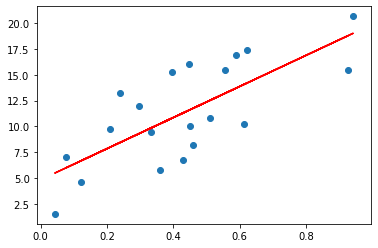

In [9]:
plt.scatter(X, y)
plt.plot(X,f(X), color='red')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [10]:
import random
X = np.random.random((100, 2))

X

array([[0.98966632, 0.0550484 ],
       [0.78384906, 0.81355358],
       [0.44935124, 0.42280584],
       [0.39820976, 0.91196999],
       [0.2917216 , 0.25751443],
       [0.89911311, 0.41118854],
       [0.19992097, 0.26572418],
       [0.41598033, 0.87163682],
       [0.43570091, 0.92739806],
       [0.99829409, 0.24105158],
       [0.08942597, 0.1984873 ],
       [0.54158625, 0.15552632],
       [0.4622538 , 0.10895355],
       [0.49287356, 0.0851971 ],
       [0.3878461 , 0.08771983],
       [0.91999081, 0.6012108 ],
       [0.60981236, 0.40795821],
       [0.08450869, 0.03126608],
       [0.8692315 , 0.15630715],
       [0.23325785, 0.4999069 ],
       [0.42940618, 0.05407137],
       [0.14880518, 0.17082198],
       [0.76117261, 0.01201431],
       [0.05549317, 0.90044984],
       [0.2574286 , 0.39681636],
       [0.2630286 , 0.70425206],
       [0.09614689, 0.81163298],
       [0.83793615, 0.79160344],
       [0.92052198, 0.58937575],
       [0.49392075, 0.36981841],
       [0.

In [11]:
y = np.random.randint(1,4,100)
y

array([3, 2, 1, 3, 1, 3, 2, 1, 3, 2, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 1, 3, 3, 2, 1, 2, 3,
       3, 3, 3, 1, 3, 1, 2, 3, 1, 2, 1, 1, 1, 1, 3, 2, 1, 3, 2, 1, 2, 2,
       1, 2, 1, 1, 3, 1, 2, 2, 2, 3, 3, 1, 1, 1, 2, 1, 1, 2, 3, 1, 3, 1,
       1, 2, 3, 3, 1, 2, 2, 2, 3, 3, 2, 1])

In [12]:
from scipy.spatial.distance import cosine
from icecream import ic
from collections import Counter

In [13]:
# 把两个列表的数据线合并再逐队取出

def model(X,y):
    return [(Xi,Yi) for Xi,Yi in zip(X,y)]

#输入两个数返回一个数
def distance(x1,x2)->float:
    return cosine(x1,x2)
    
#
def predict(x,k=5):
    most_similarity=sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
#     counter=Counter(most_similarity) 
    counter = Counter(np.array(most_similarity)[:, 1])
    ic(counter)
    #取出来的X不是元组
    return counter.most_common(1)[0][0]

In [14]:
predict((1,1))
#取出来的X不是元组

ic| counter: Counter({3: 2, 1: 2, 2: 1})


3

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [15]:
#entropy公式是H(X)=-Pr(X)log(Pr(X))

In [16]:
from collections import Counter
# from icecream import ic
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
#     ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [17]:
entropy([1, 1, 1, 0])

0.5623351446188083

In [18]:
entropy([1, 1, 1, 1])

-0.0

In [19]:
def entropy_gao(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in elements]
    return - sum(p * np.log(p) for p in probs)

##为什么复现高老师的函数会出现不同情况，高老师的结果是0.4316271552006655
entropy_gao([1, 1, 1, 0])

0.9938582532964797

In [20]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [21]:
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
dataset 

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [22]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [23]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()
sub_split_1

[1, 1, 0, 0, 0]

In [24]:
sub_split_2 = dataset[dataset['family_number'] == 2]['bought'].tolist()
sub_split_2

[1, 1]

In [25]:
_sub_split_1 = dataset[dataset['gender'] == 'M']['bought'].tolist()
_sub_split_1 

[0, 0, 1]

In [26]:
_sub_split_2 = dataset[dataset['gender'] == 'F']['bought'].tolist()
_sub_split_2

[1, 1, 1, 0]

In [27]:
entropy(_sub_split_1) + entropy(_sub_split_2)

1.198849312913621

In [28]:
entropy(sub_split_1) + entropy(sub_split_2)

0.6730116670092565

In [29]:
dataset.columns.tolist()

['gender', 'income', 'family_number', 'bought']

In [30]:
from icecream import ic
def find_the_min_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target} #columns
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_split_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [31]:
find_the_min_spilter(dataset, 'bought')

ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| entropy_2: 0.6730116670092565
ic| entropy_v:

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [32]:
dataset[dataset['family_number']==2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [33]:
dataset[dataset['family_number']!=2]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [34]:
find_the_min_spilter(dataset[dataset['family_number']!=2], 'bought')

ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_split_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_split_2: [1, 1]
ic| entropy_2: 0
ic| entropy_v: 0.6730116670092565


spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


('income', '+10')

In [35]:
sub_df = dataset[dataset['family_number'] != 2]

In [36]:
sub_df[sub_df['gender'] == 'M']

,gender,income,family_number,bought
4,M,+10,1,0
5,M,+10,1,0


In [37]:
sub_df[sub_df['gender'] != 'M']

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0


In [38]:
find_the_min_spilter(sub_df[sub_df['gender'] != 'M'], 'bought')

ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: -0.0
ic| sub_split_2: [1, 1]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6931471805599453
ic| sub_split_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| f: 'gender'
ic| values: {'F'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| entropy_2: 0
ic| entropy_v: 0.6365141682948128
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6365141682948128
ic| sub_split_2: [1, 1]
ic| entropy_2: 0
ic| entropy_v: 0.6365141682948128


spliter is: ('family_number', 1)
the min entropy is: 0.6365141682948128


('family_number', 1)

结果和高老师的不一样

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
%matplotlib inline

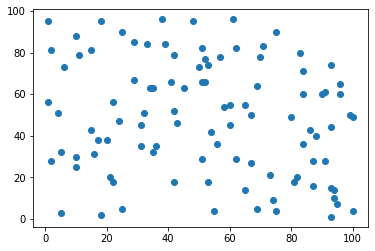

In [40]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]
plt.scatter(X1, X2)

In [41]:

tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]



In [42]:
model4 = KMeans(n_clusters=5, max_iter=500, init='k-means++')

In [43]:
model4.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
model4.cluster_centers_

array([[86.        , 62.27777778],
       [21.71428571, 85.21428571],
       [50.95833333, 63.08333333],
       [18.72727273, 31.27272727],
       [78.40909091, 16.22727273]])

In [45]:
model4.labels_

array([0, 0, 1, 3, 3, 0, 0, 2, 0, 4, 4, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2,
       3, 4, 4, 3, 1, 1, 2, 3, 1, 4, 2, 3, 1, 3, 4, 3, 2, 4, 0, 3, 3, 4,
       1, 0, 0, 0, 2, 4, 1, 1, 2, 2, 2, 3, 4, 2, 4, 0, 2, 2, 4, 2, 0, 1,
       4, 0, 2, 2, 0, 0, 4, 4, 3, 4, 0, 2, 3, 2, 2, 3, 3, 3, 4, 4, 3, 4,
       4, 1, 3, 3, 1, 3, 3, 0, 4, 4, 2, 3])

In [46]:
from collections import defaultdict
centers = defaultdict(list)


In [47]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

NameError: name 'cluster' is not defined

In [ ]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: 因为模型都是对现实情况进行了一定的简化，不是绝对贴合现实的，因此是错误的，但是部分模型简化后非常实用，计算后的结果也和现实基本一致

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans: 过拟合是模型在训练集效果很好，但是测试集效果不好，原因包括：1.模型太复杂2.数据量太少3.训练集和测试集特征分布不一致4.样本里的噪音数据干扰过大，大到模型过分记住了噪音特征，反而忽略了真实的输入输出间的关系。 

欠拟合是模型在训练集上效果不好，拟合效果较差，原因包括：1.模型太简单2.数据特征太少或者X,Y本身关系不大

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:precision是精确率，是真正率与真正率假正率之和的比值，recall是召回率，是真正率与真正率假负率之和的比值，由于precision和recall往往在训练中是冲突的，因此引入F1是调和度，是精确率和召回率的均衡指标。较少使用F2指标，其基本原理和F1相似，但系数不同，更侧重于precision的影响

AUC是一个模型评价指标，用于二分类模型的评价。AUC是“Area under Curve（曲线下的面积）”的英文缩写，而这条“Curve（曲线）”就是ROC曲线。 机器学习中的很多模型对于分类问题的预测结果大多是概率，即属于某个类别的概率，如果计算准确率的话，就要把概率转化为类别，这就需要设定一个阈值，概率大于某个阈值的属于一类，概率小于某个阈值的属于另一类，而阈值的设定直接影响了准确率的计算。


<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:机器学习这种思维是利用过去的数据，去拟合复杂的模型，同时，机器学习是一种data-driven编程范式，根据输入的数据决定模型内部的状态或参数，并进行响应的输出。而分析式编程是对于容易得到的模型进行直接求解。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

如果能正确定义评价模型的标准，说明对业务场景和模型充分理解，并且损失函数这个模型重点很好定义，继而模型可以训练出准确合理的模型。
问题的另外一半是要如何训练出理想的模型，这依赖于数据收集和处理，使用各种trick训练模型！

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

H(x) = E[I(xi)] = E[ log(2,1/P(xi)) ] = -∑P(xi)log(2,P(xi)) (i=1,2,..n)。
老师写的那种形式怎么做的？

基于Python逐步实现Decision Tree(决策树)，分为以下几个步骤：

加载数据集

熵的计算

根据最佳分割feature进行数据分割

根据最大信息增益选择最佳分割feature

递归构建决策树

样本分类

In [ ]:
# def predicate(gender, income, family_number):
#     F=[]
#     V=[]
#     for 
#     f,v=find_the_min_spilter(training_data,'bought')
#     F.append(f)
#     V.append(v)
    
#     return 

In [ ]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [ ]:
mock_dataset = pd.DataFrame(mock_data)

In [ ]:
class Node(object):
    """
    Tree Node.
    """
    def __init__(self, feature=None, left=None, right=None, results=None, **kwargs):
        self.feature = feature
        self.left = left
        self.right = right
        self.results = results

In [ ]:
def divide_dataset(dataset, col, val):
    """
    divide dataset based on column and value
    """
    if isinstance(val, (float, int)):
        # numerical value
        dataset1 = dataset[dataset[col] <= val]
        dataset2 = dataset[dataset[col] > val]
    else:
        # catogrical value
        dataset1 = dataset[dataset[col] == val]
        dataset2 = dataset[dataset[col] != val]

    return dataset1, dataset2

In [ ]:
def build_tree(dataset:pd.DataFrame, target:str, **kwargs):
    """
    Build decision tree.
    """
    if dataset.empty: return None

    cols = dataset.columns[:-1]
    best_gain = 0.0
    min_entropy = float(np.inf)
    org_entropy = entropy(dataset[target])
    best_feature = ()
    split_dataset = ()

    # choose feature
    for i, col in enumerate(cols):
        for val in set(dataset[col]):
            # divide dataset
            dataset1, dataset2 = divide_dataset(dataset, col, val)

            # calculate information gain
            info_gain = gain(dataset1[target].to_list(), dataset2[target].to_list())
            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = (i, val)
                split_dataset = (dataset1, dataset2)

    if best_gain > 0.0: 
        left_node = build_tree(split_dataset[0], target)
        right_node = build_tree(split_dataset[1], target)
        return Node(feature=best_feature, left=left_node, right=right_node,
                    results=dataset[target].to_list())
    else:
         return Node(results=dataset[target].to_list())

In [ ]:
from collections import Counter
import numpy as np

def entropy(elements:list):
    counter=Counter(elements)
    probs=[counter[c]/len(elements) for c in set(elements)]
    print('probs:',probs)
    return - sum(p * np.log(p) for p in probs)



In [ ]:
def gain(dataset1:list, dataset2:list):
    """
    information gain
    """
    if len(dataset1) == 0 or len(dataset2) == 0:
        return 0.0

    dataset = dataset1 + dataset2
    dataset_ent = entropy(dataset)
    dataset1_ent = entropy(dataset1)
    dataset2_ent = entropy(dataset2)

    dataset1_prob = len(dataset1)/len(dataset)

    return dataset_ent - sum([dataset1_prob * dataset1_ent, (1 - dataset1_prob) * dataset2_ent])
    

In [ ]:
def predict(tree, x):
    """
    预测
    """
    if tree.feature:
        col, value = tree.feature

        if isinstance(x[col], (int, float)):
            # numerical value
            if x[col] <= value:
                return predict(tree.left, x)
            else:
                return predict(tree.right, x)
        else:
            # categorical value
            if x[col] == value:
                return predict(tree.left, x)
            else:
                return predict(tree.right, x)
    else:
        counter = Counter(tree.results)
        return counter.most_common()[0][0]
    

In [ ]:
dicision_tree = build_tree(mock_dataset, 'bought')

In [ ]:
predict(dicision_tree, ['F', '+10', 1])

In [ ]:
predict(dicision_tree, ['F', '-10', 1])

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [ ]:
# you code here

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [ ]:
boston_dataset = load_boston()

In [ ]:
boston_df = pd.DataFrame(np.hstack([boston_dataset.data, boston_dataset.target.reshape(-1,1)]),
                        columns=list(boston_dataset.feature_names) + ['PRICE'])

In [ ]:
boston_df.head()

In [ ]:
plt.scatter(boston_df['RM'], boston_df['PRICE'])


In [ ]:
def price(x, w, b):
    return w * x + b

def loss(y, y_hat):
    return sum([np.abs(yi - yi_hat) for yi, yi_hat in zip(y, y_hat)]) / len(y)

In [ ]:
def partial_derivative_w(x, y, y_hat):
    return -sum([(yi - yi_hat) * xi for xi, yi, yi_hat in zip(x, y, y_hat)]) / len(y)

def partial_derivative_b(y, y_hat):
    return -sum([ yi - yi_hat for yi, yi_hat in zip(y, y_hat)]) / len(y)

In [ ]:
import random


class LRModel(object):
    """
    Linear Regression model.
    """
    def __init__(self, w=None, b=None, iter_num=300, learning_rate=0.001):
        self._w = w or random.random() * 200 - 100
        self._b = b or random.random() * 200 - 100
        self._iter_num = iter_num
        self._learning_rate = learning_rate
        self._losses = []

    def train(self, X, Y, ):
        """
        Train
        """
        w = self._w
        b = self._b
        self._losses = []

        for i in range(self._iter_num):
            Y_hat = [w * xi + b for xi in X]

            current_loss = loss(Y, Y_hat)
            self._losses.append(current_loss)

#             print('Interation {}, loss {}, param k {}, param b {}'.format(i, current_loss, w, b))

            w_gradient = partial_derivative_w(X, Y, Y_hat)
            b_gradient = partial_derivative_b(Y, Y_hat)

            w -= self._learning_rate * w_gradient
            b -= self._learning_rate * b_gradient

        self._w = w
        self._b = b

    def predict(self, X):
        return [ self._w * xi + self._b for xi in X]

In [ ]:
X = boston_df['RM']
Y = boston_df['PRICE']
X.shape, Y.shape

In [ ]:
lr = LRModel()
lr.train(X, Y)

plt.plot(np.arange(lr._iter_num), lr._losses)

In [ ]:
Y_predict = lr.predict(X)

plt.scatter(X, Y)
plt.scatter(X, Y_predict)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)